In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('vTargetMailCustomer.csv', encoding='latin1')
selected_features = ['CustomerKey', 'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren', 'EnglishEducation', 'EnglishOccupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'Region', 'Age', 'BikeBuyer']

target_buyers = data[selected_features]
target_buyers.to_csv('vBikeBuyers.csv', index=False)
data = pd.read_csv('vBikeBuyers.csv')
data = data.sample(n=1000)
data.head()

,CustomerKey,MaritalStatus,Gender,YearlyIncome,TotalChildren,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
10731,21731,M,F,40000,1,Graduate Degree,Skilled Manual,1,0,1-2 Miles,North America,42,0
11616,22616,S,M,40000,0,Graduate Degree,Clerical,1,0,0-1 Miles,Europe,46,1
9438,20438,S,M,60000,0,Partial College,Skilled Manual,1,2,5-10 Miles,North America,39,0
3069,14069,M,F,70000,5,Bachelors,Professional,1,2,0-1 Miles,Pacific,53,0
15806,26806,M,M,50000,3,Bachelors,Skilled Manual,1,1,2-5 Miles,North America,49,0


In [2]:
data = data.drop(columns=['CustomerKey'], axis=1, inplace=False)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 10731 to 714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MaritalStatus      1000 non-null   object
 1   Gender             1000 non-null   object
 2   YearlyIncome       1000 non-null   int64 
 3   TotalChildren      1000 non-null   int64 
 4   EnglishEducation   1000 non-null   object
 5   EnglishOccupation  1000 non-null   object
 6   HouseOwnerFlag     1000 non-null   int64 
 7   NumberCarsOwned    1000 non-null   int64 
 8   CommuteDistance    1000 non-null   object
 9   Region             1000 non-null   object
 10  Age                1000 non-null   int64 
 11  BikeBuyer          1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 101.6+ KB


In [3]:
data['MaritalStatus'] = data['MaritalStatus'].replace({'M': 1, 'S': 0})
data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})

# One hot Encoding Region
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[['Region']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Region']))
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)
data = data.drop(columns=['Region'], axis=1)

# One hot Encoding EnglishOccupation
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[['EnglishOccupation']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['EnglishOccupation']))
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)
data = data.drop(columns=['EnglishOccupation'], axis=1)

# One hot Encoding EnglishEducation
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[['EnglishEducation']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['EnglishEducation']))
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)
data = data.drop(columns=['EnglishEducation'], axis=1)

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[['CommuteDistance']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['CommuteDistance']))
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)
data = data.drop(columns=['CommuteDistance'], axis=1)
data.head(20)

,MaritalStatus,Gender,YearlyIncome,TotalChildren,HouseOwnerFlag,NumberCarsOwned,Age,BikeBuyer,Region_Europe,Region_North America,...,EnglishEducation_Bachelors,EnglishEducation_Graduate Degree,EnglishEducation_High School,EnglishEducation_Partial College,EnglishEducation_Partial High School,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
0,1,1,40000,1,1,0,42,0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,40000,0,1,0,46,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,60000,0,1,2,39,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,70000,5,1,2,53,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0,50000,3,1,1,49,0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,1,70000,5,1,2,63,1,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0,1,90000,4,0,3,65,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1,1,60000,0,1,0,49,0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1,1,40000,2,1,1,57,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1,1,70000,4,1,2,65,1,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
# Creating feature and target column
features = list(data.loc[:, data.columns != 'BikeBuyer'])

X = data.loc[:, data.columns != 'BikeBuyer']
y = data['BikeBuyer']

In [5]:
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)
### Getting better results
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 7, 10, 12],
    'min_samples_leaf': [1, 2, 8, 10],
    'min_samples_split': [2, 17, 20, 28]
    
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
####### Decision Trees #########

dtree = DecisionTreeClassifier(**best_params)
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print('Best Parameters:', best_params)
print('Classification Tree Prediction:', y_pred)

Best Parameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Tree Prediction: [0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0
 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0]


In [6]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print("Report:")
print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.66
Report:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64        92
           1       0.70      0.66      0.68       108

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.66      0.66      0.66       200



In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=1)

###### Naïve Bayes #######
gnb = GaussianNB()

param_grid = {'var_smoothing': [1e-14, 1e-9, 1e-8, 1e-7, 1e-1]}

grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best params:", best_params)

gnb.fit(X_train, y_train)
best_gnb = grid_search.best_estimator_

y_pred = gnb.predict(X_test)
print('Classification Naive Bayes:', y_pred)

Best params: {'var_smoothing': 1e-09}
Classification Naive Bayes: [1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1
 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1
 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0
 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0
 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1
 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1]


In [9]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy) 
print('Report:')
print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.59
Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       198
           1       0.60      0.57      0.59       202

    accuracy                           0.59       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.59      0.59      0.59       400



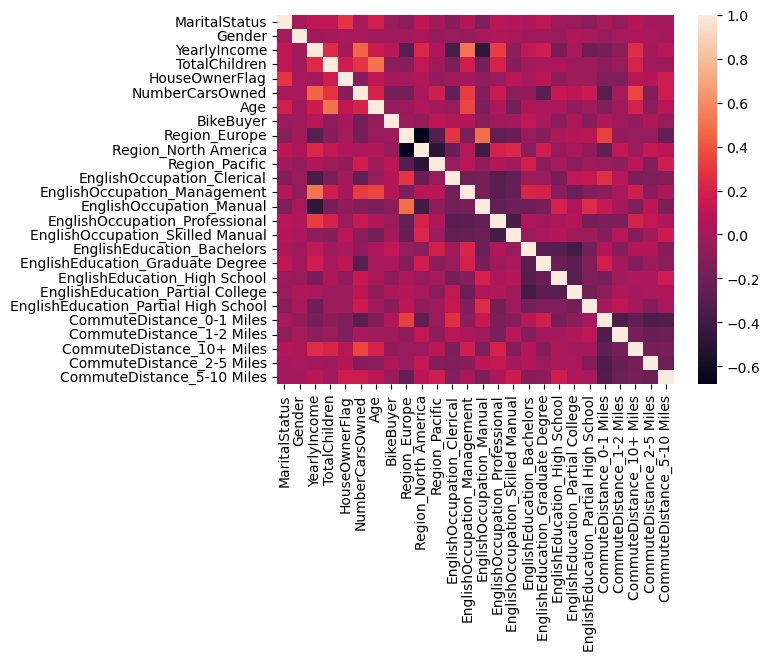

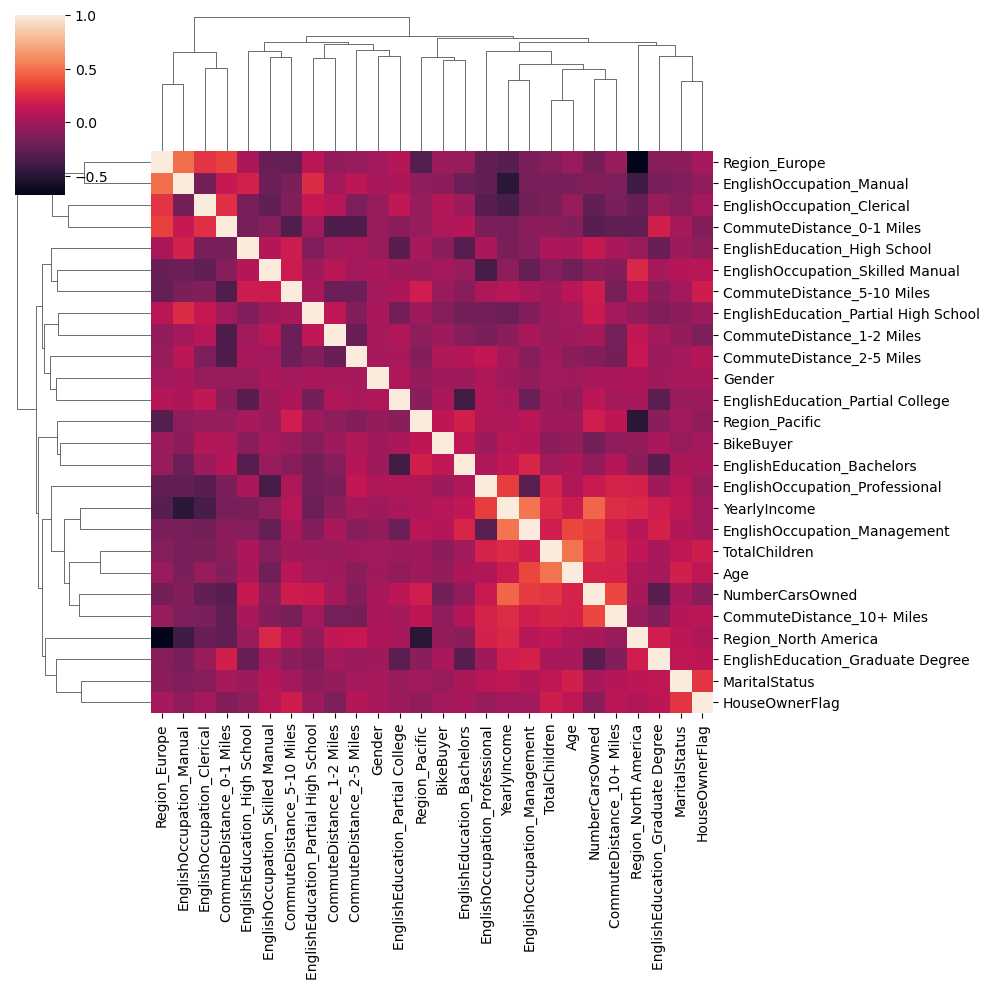

In [11]:
import seaborn as sns

correlations = data.corr()

sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=False)

sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=False)

In [16]:
from sklearn.ensemble import RandomForestClassifier

######## Random Forest ##########
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 7, 10, 12],
    'min_samples_leaf': [1, 2, 8, 10],
    'min_samples_split': [2, 17, 20, 28] 
}

rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
#rf_clf.fit(X_train, y_train)
best_params = grid_search.best_params_

y_pred = grid_search.predict(X_test)

print('Best params:', best_params)
print('Random Forest:', y_pred)

Best params: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Random Forest: [1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1
 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1
 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1
 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1]


In [17]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy) 
print('Report:')
print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.6325
Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       198
           1       0.65      0.59      0.62       202

    accuracy                           0.63       400
   macro avg       0.63      0.63      0.63       400
weighted avg       0.63      0.63      0.63       400

